<a href="https://colab.research.google.com/github/Jeremmy18/modelo_viviendas/blob/main/modelo_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Investigación y Desarrollo Práctico: "Construcción de una Red Neuronal para Predecir Precios de Viviendas"**

# Investigación Teórica
**1. ¿Qué es una red neuronal artificial?**

En mi entendimiento, una red neuronal artificial es como un cerebro digital que imita cómo aprendemos los humanos. Yo la veo como capas de "neuronas" conectadas que procesan información. Cada conexión tiene un "peso" que ajusta durante el entrenamiento. Entre más datos le doy, mejor aprende a reconocer patrones y hacer predicciones.

**2. ¿Qué es una regresión lineal y cómo se aplica en ML?**

Para mí, la regresión lineal es la herramienta más sencilla para predecir valores continuos. Básicamente dibuja una línea recta que mejor se ajusta a mis datos. En machine learning, la uso cuando quiero entender cómo una variable (como el número de habitaciones) afecta a otra (como el precio de una casa). Es mi primera opción por su simplicidad y facilidad de interpretación.

**3. ¿Para qué sirve TensorFlow/Keras en el desarrollo de modelos ML?**

TensorFlow/Keras son mis herramientas favoritas para construir modelos de deep learning sin complicarme demasiado. Keras me permite armar redes neuronales con pocas líneas de código, mientras que TensorFlow maneja los cálculos pesados en segundo plano. Lo uso especialmente cuando necesito modelos más complejos que van más allá de la regresión lineal.

**4. ¿Por qué es importante el control de versiones con GitHub?**

- GitHub es mi diario de trabajo digital. Me permite:

- Guardar cada cambio que hago en mi código sin miedo a perderlo

- Volver atrás si cometo un error

- Mostrar mi progreso a otros

- Colaborar fácilmente en equipo
Sin GitHub, sentiría que trabajo sin red de seguridad.



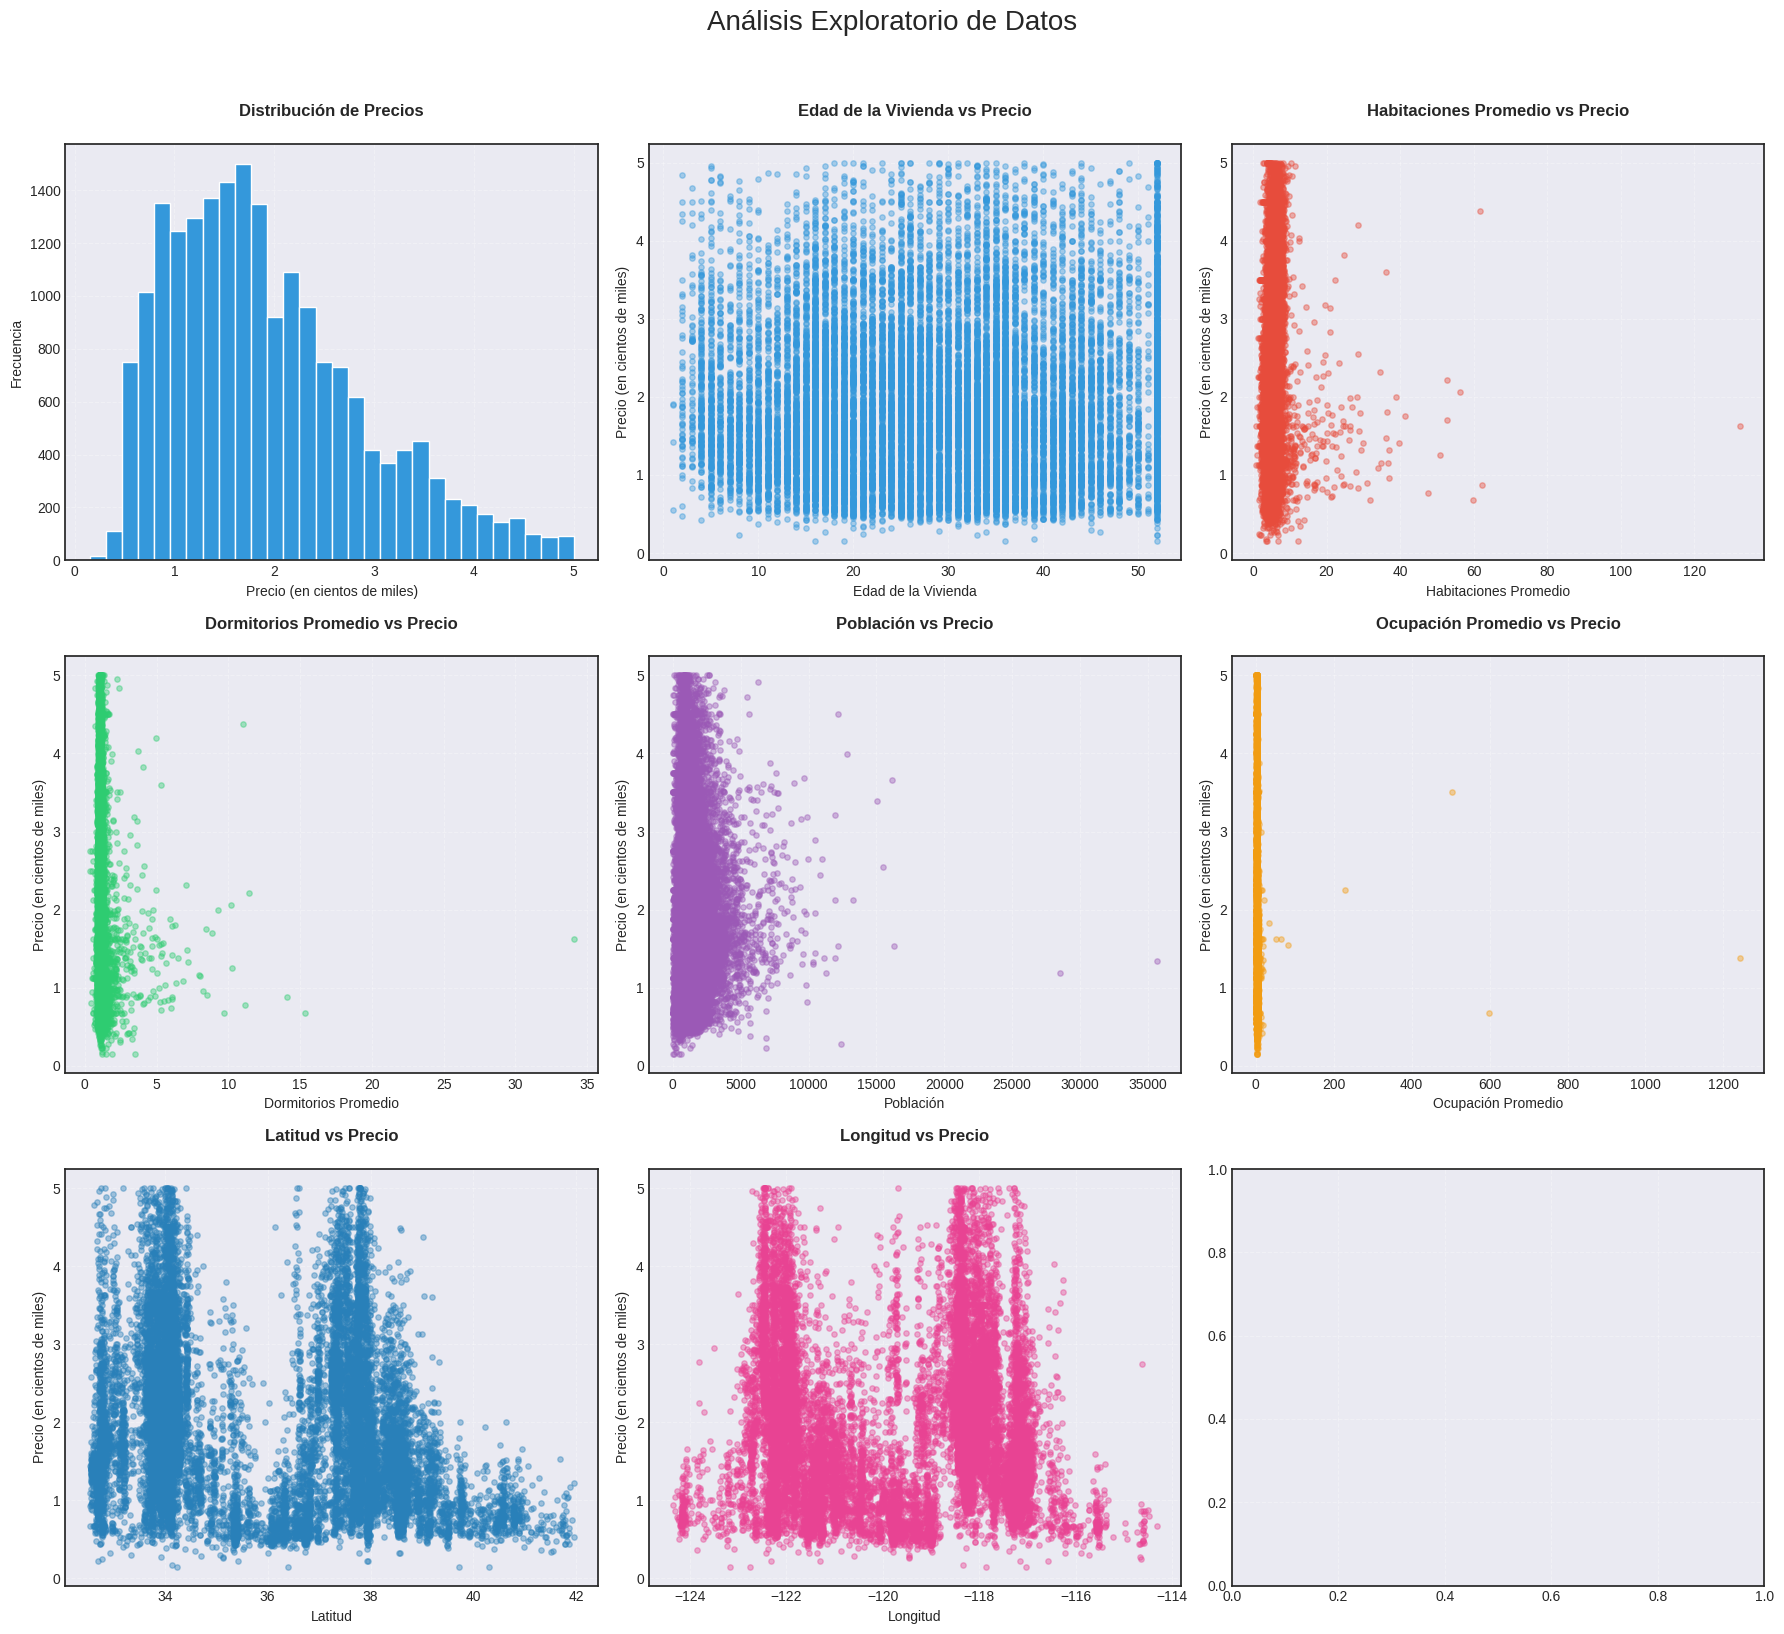


Resultados de Regresión Lineal Simple:


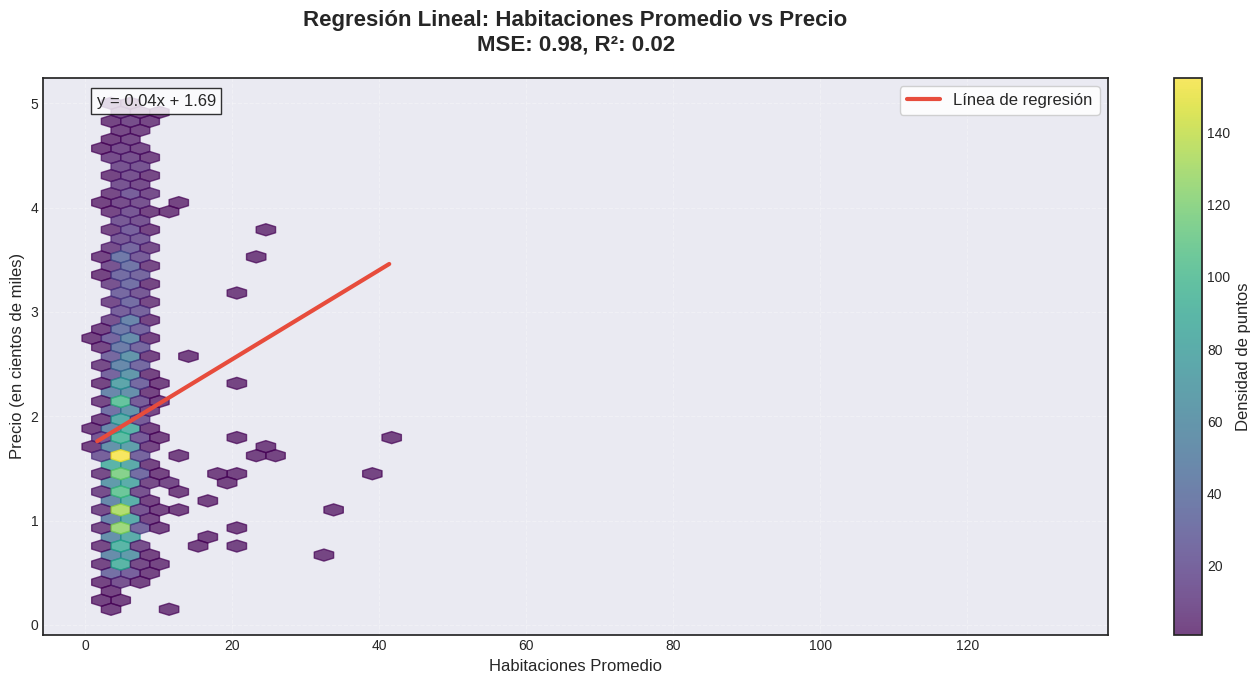

Habitaciones Promedio: MSE = 0.98, R² = 0.02


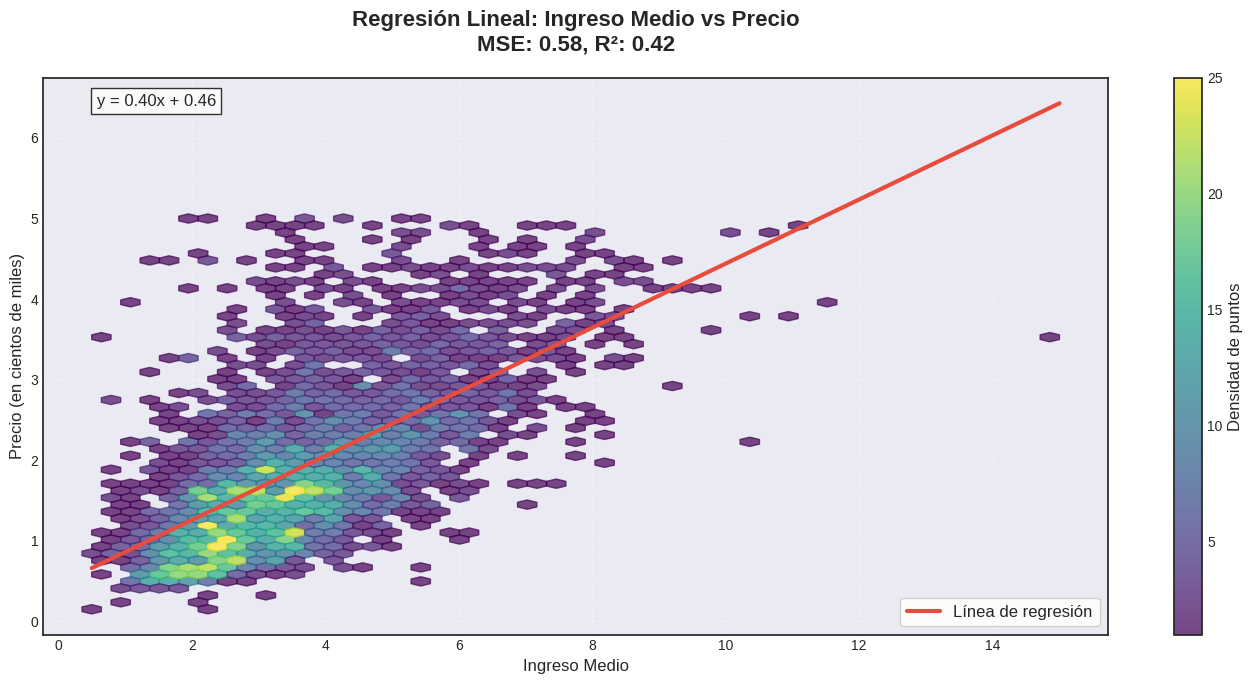

Ingreso Medio: MSE = 0.58, R² = 0.42


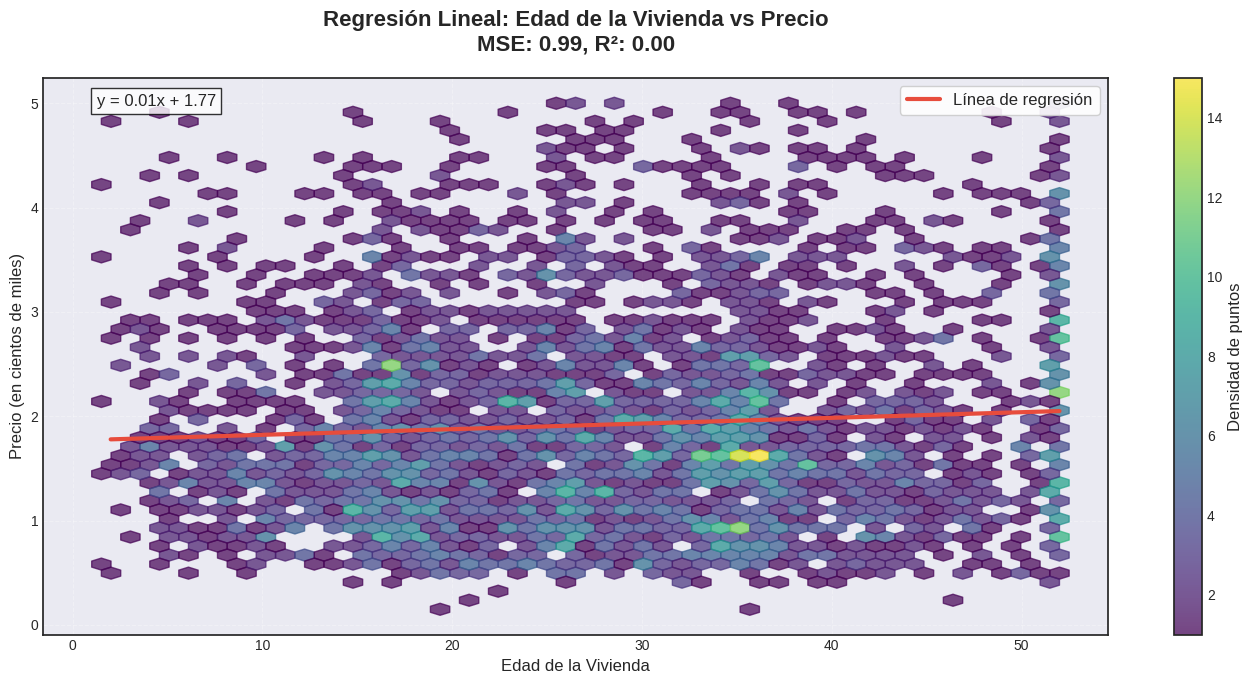

Edad de la Vivienda: MSE = 0.99, R² = 0.00

Entrenando modelo de red neuronal...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


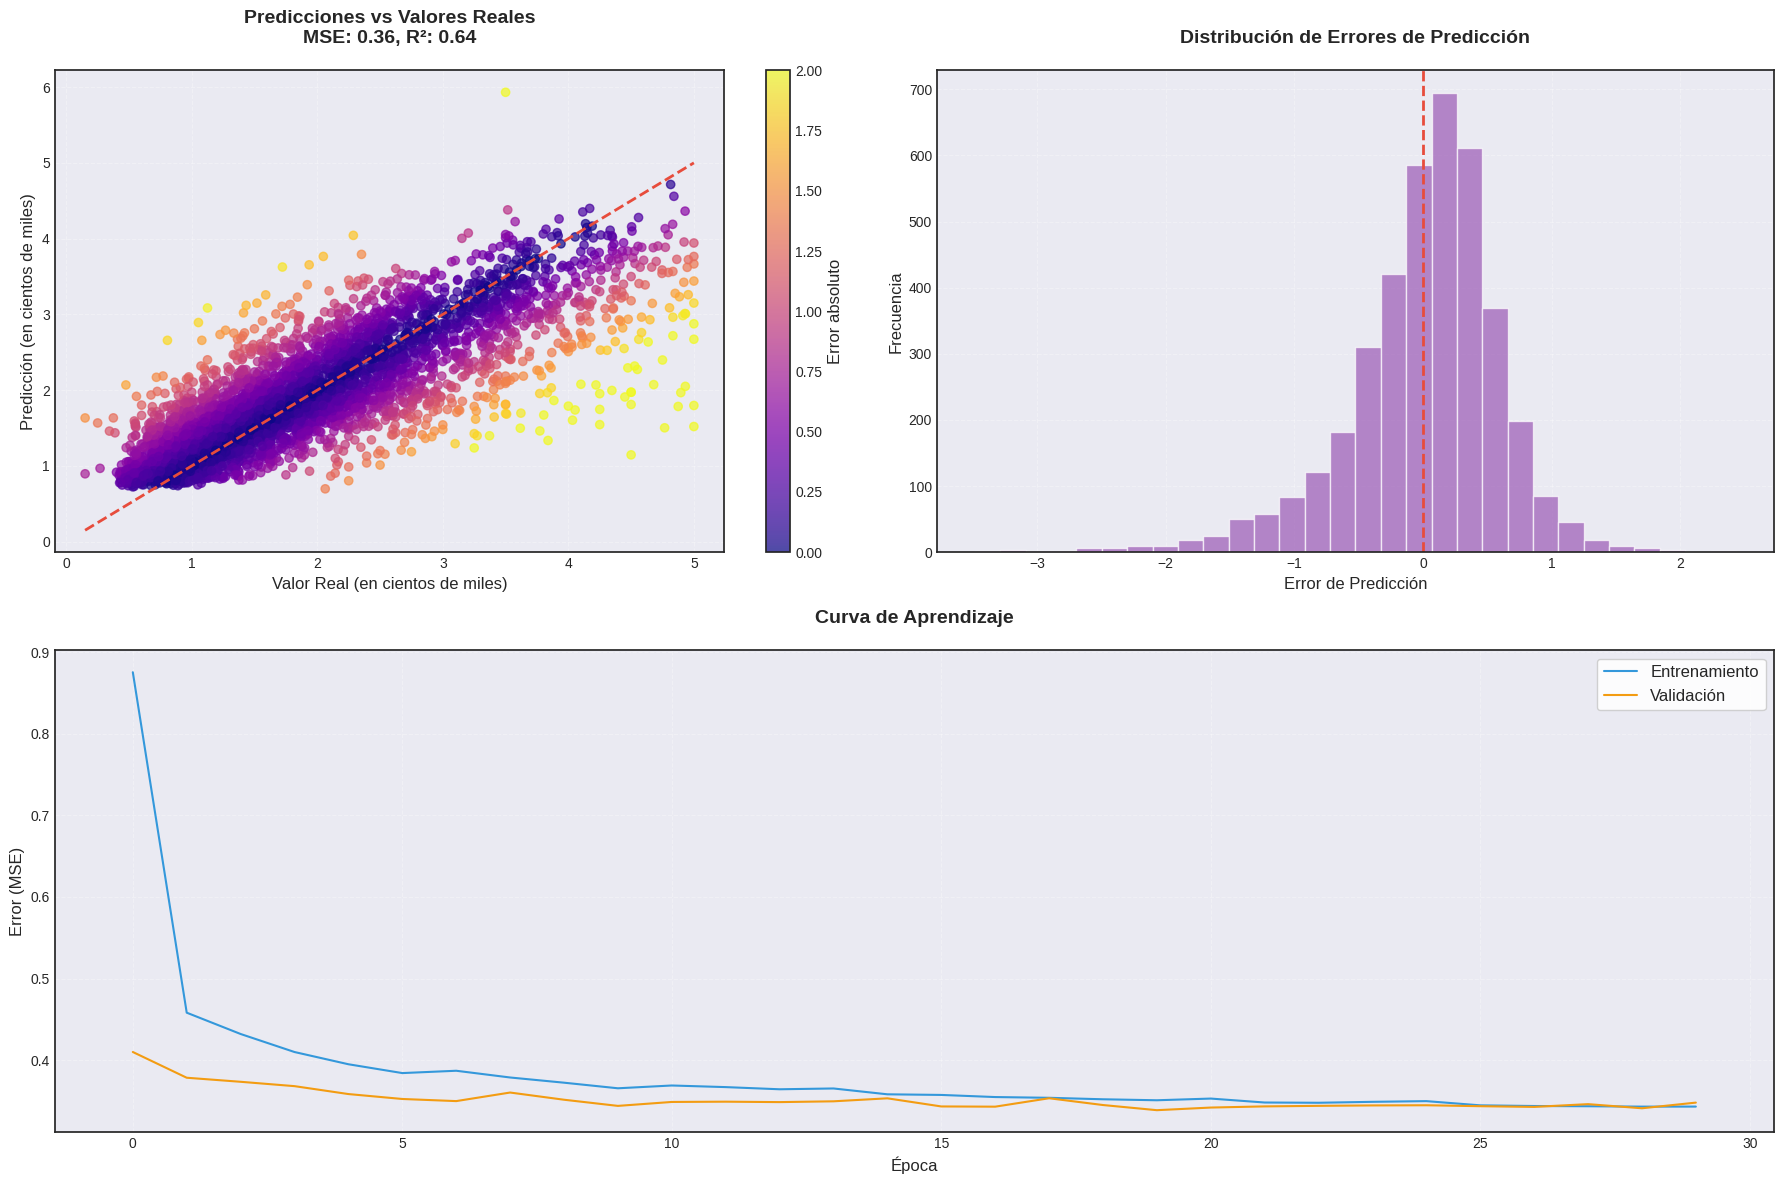

Resultados Red Neuronal - MSE: 0.36, R²: 0.64


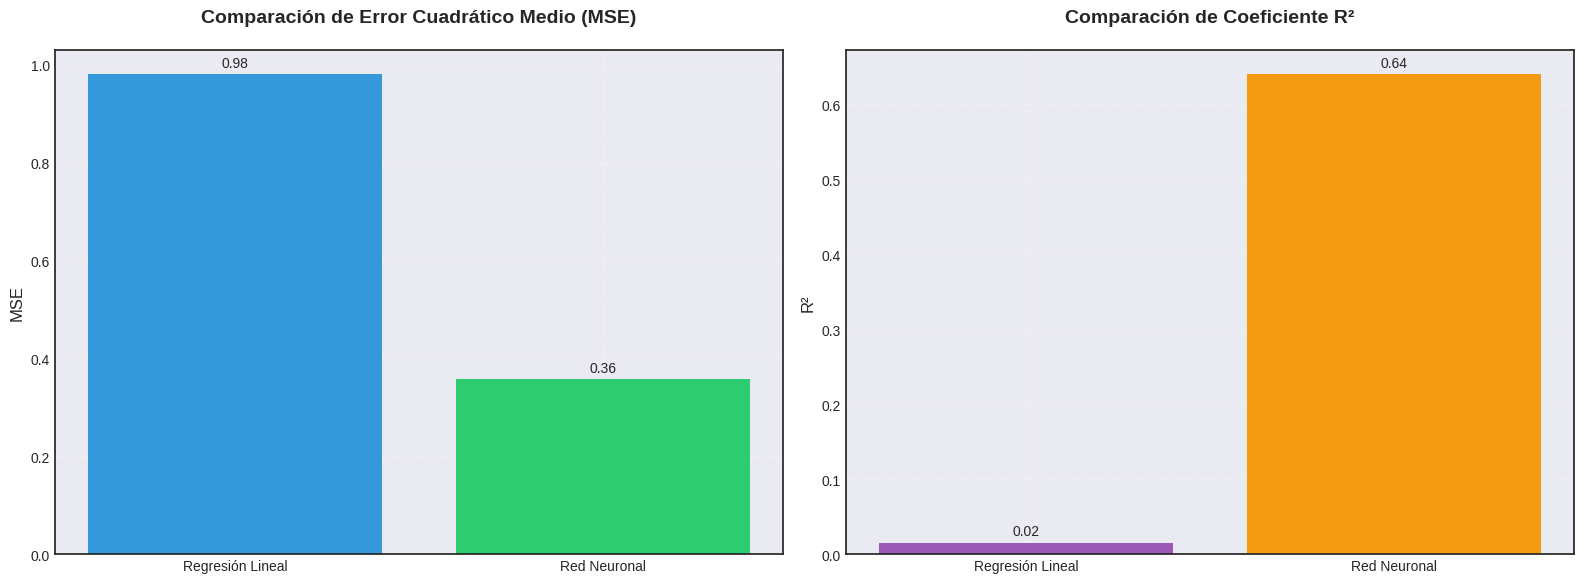


Análisis de múltiples características:

Analizando la característica más importante (Ingreso Medio)...
Ingreso Medio        | MSE: 0.58 | R²: 0.42 | Correlación: 0.64
Habitaciones Promedio | MSE: 0.98 | R²: 0.02 | Correlación: 0.11
Edad de la Vivienda  | MSE: 0.99 | R²: 0.00 | Correlación: 0.07

Resumen de resultados:
       Característica  MSE_Lineal  R2_Lineal  Correlación
        Ingreso Medio    0.578504   0.419812     0.642611
Habitaciones Promedio    0.981754   0.015390     0.109673
  Edad de la Vivienda    0.993787   0.003322     0.067948


In [1]:
# -*- coding: utf-8 -*-
"""
Análisis Predictivo de Precios de Viviendas usando Regresión Lineal y Redes Neuronales
GitHub: https://github.com/tu_usuario/housing-price-prediction
"""

# =============================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# =============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# =============================================
# 2. CONFIGURACIÓN DE ESTILO PARA GRÁFICOS
# =============================================
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.edgecolor': '0.15',
    'axes.linewidth': 1.25,
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.facecolor': 'white'
})

# Paleta de colores mejorada
COLORS = {
    'blue': '#3498db',
    'red': '#e74c3c',
    'green': '#2ecc71',
    'purple': '#9b59b6',
    'orange': '#f39c12',
    'darkblue': '#2980b9',
    'pink': '#e84393',
    'teal': '#1abc9c',
    'yellow': '#f1c40f'
}

# =============================================
# 3. CARGA Y PREPROCESAMIENTO DE DATOS
# =============================================
def load_and_preprocess_data():
    """Carga y preprocesa los datos de viviendas de California"""
    # Cargar dataset
    california = fetch_california_housing()
    data = pd.DataFrame(california.data, columns=california.feature_names)
    data['MedHouseVal'] = california.target * 100000  # Convertir a dólares

    # Limitar valores extremos
    data = data[data['MedHouseVal'] <= 500000]

    # Diccionario para mapear nombres de características
    feature_names = {
        'MedInc': 'Ingreso Medio',
        'HouseAge': 'Edad de la Vivienda',
        'AveRooms': 'Habitaciones Promedio',
        'AveBedrms': 'Dormitorios Promedio',
        'Population': 'Población',
        'AveOccup': 'Ocupación Promedio',
        'Latitude': 'Latitud',
        'Longitude': 'Longitud'
    }

    return data, feature_names

data, feature_names = load_and_preprocess_data()

# =============================================
# 4. ANÁLISIS EXPLORATORIO (EDA)
# =============================================
def plot_eda(data):
    """Visualización exploratoria de los datos"""
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Análisis Exploratorio de Datos', fontsize=20, y=1.02)

    # Histograma de precios
    axes[0, 0].hist(data['MedHouseVal']/100000, bins=30, color=COLORS['blue'], edgecolor='white')
    axes[0, 0].set_title('Distribución de Precios', fontsize=12)
    axes[0, 0].set_xlabel('Precio (en cientos de miles)', fontsize=10)
    axes[0, 0].set_ylabel('Frecuencia', fontsize=10)

    # Gráficos de dispersión para cada característica
    features = list(feature_names.keys())
    colors = list(COLORS.values())

    for i, feature in enumerate(features[1:]):  # Omitir MedHouseVal
        row = (i+1) // 3
        col = (i+1) % 3
        axes[row, col].scatter(data[feature], data['MedHouseVal']/100000,
                              alpha=0.4, color=colors[i % len(colors)], s=15)
        axes[row, col].set_title(f'{feature_names[feature]} vs Precio', fontsize=12)
        axes[row, col].set_xlabel(feature_names[feature], fontsize=10)
        axes[row, col].set_ylabel('Precio (en cientos de miles)', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_eda(data)

# =============================================
# 5. REGRESIÓN LINEAL SIMPLE
# =============================================
def linear_regression_analysis(data, feature='AveRooms'):
    """Realiza regresión lineal simple y visualiza resultados"""
    # Preparar datos
    X = data[[feature]].values
    y = data['MedHouseVal'].values / 100000  # Convertir a cientos de miles

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar modelo
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualización
    plt.figure(figsize=(14, 7))

    # Gráfico de dispersión con colores por densidad
    hexbin = plt.hexbin(X_test.flatten(), y_test, gridsize=50, cmap='viridis',
                       mincnt=1, alpha=0.7, extent=[X.min(), X.max(), y.min(), y.max()])
    plt.colorbar(hexbin, label='Densidad de puntos')

    # Línea de regresión
    sorted_idx = np.argsort(X_test.flatten())
    plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color=COLORS['red'],
             linewidth=3, label='Línea de regresión')

    # Configuración del gráfico
    plt.title(f'Regresión Lineal: {feature_names[feature]} vs Precio\nMSE: {mse:.2f}, R²: {r2:.2f}',
              fontsize=16, pad=20)
    plt.xlabel(feature_names[feature], fontsize=12)
    plt.ylabel('Precio (en cientos de miles)', fontsize=12)
    plt.legend(fontsize=12)

    # Añadir ecuación
    equation = f'y = {lr_model.coef_[0]:.2f}x + {lr_model.intercept_:.2f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    return mse, r2

# Ejecutar regresión lineal para diferentes características
print("\nResultados de Regresión Lineal Simple:")
for feature in ['AveRooms', 'MedInc', 'HouseAge']:
    mse, r2 = linear_regression_analysis(data, feature)
    print(f"{feature_names[feature]}: MSE = {mse:.2f}, R² = {r2:.2f}")

# =============================================
# 6. MODELO DE RED NEURONAL
# =============================================
def neural_network_model(data):
    """Construye, entrena y evalúa un modelo de red neuronal"""
    # Seleccionar características y objetivo
    features = ['MedInc', 'AveRooms', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup']
    X = data[features].values
    y = data['MedHouseVal'].values / 100000  # Escalar

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construir modelo
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    # Compilar modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])

    # Callback para early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenar modelo
    history = model.fit(X_train_scaled, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=32,
                        verbose=0,
                        callbacks=[early_stop])

    # Evaluar modelo
    y_pred = model.predict(X_test_scaled).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Visualización de resultados
    plot_nn_results(y_test, y_pred, history, mse, r2)

    return model, mse, r2

def plot_nn_results(y_test, y_pred, history, mse, r2):
    """Visualiza los resultados de la red neuronal"""
    # Crear figura con subplots
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 2)

    # Subplot 1: Predicciones vs Valores reales
    ax1 = fig.add_subplot(gs[0, 0])
    sc = ax1.scatter(y_test, y_pred, c=np.abs(y_test - y_pred),
                    cmap='plasma', alpha=0.7, vmin=0, vmax=2)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             '--', color=COLORS['red'], linewidth=2)
    ax1.set_title(f'Predicciones vs Valores Reales\nMSE: {mse:.2f}, R²: {r2:.2f}', fontsize=14)
    ax1.set_xlabel('Valor Real (en cientos de miles)', fontsize=12)
    ax1.set_ylabel('Predicción (en cientos de miles)', fontsize=12)
    plt.colorbar(sc, ax=ax1, label='Error absoluto')

    # Subplot 2: Distribución de errores
    ax2 = fig.add_subplot(gs[0, 1])
    error = y_pred - y_test
    ax2.hist(error, bins=30, color=COLORS['purple'], alpha=0.7, edgecolor='white')
    ax2.axvline(x=0, color=COLORS['red'], linestyle='--', linewidth=2)
    ax2.set_title('Distribución de Errores de Predicción', fontsize=14)
    ax2.set_xlabel('Error de Predicción', fontsize=12)
    ax2.set_ylabel('Frecuencia', fontsize=12)

    # Subplot 3: Curva de aprendizaje
    ax3 = fig.add_subplot(gs[1, :])
    ax3.plot(history.history['loss'], label='Entrenamiento', color=COLORS['blue'])
    ax3.plot(history.history['val_loss'], label='Validación', color=COLORS['orange'])
    ax3.set_title('Curva de Aprendizaje', fontsize=14)
    ax3.set_xlabel('Época', fontsize=12)
    ax3.set_ylabel('Error (MSE)', fontsize=12)
    ax3.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

# Entrenar y evaluar modelo de red neuronal
print("\nEntrenando modelo de red neuronal...")
nn_model, nn_mse, nn_r2 = neural_network_model(data)
print(f"Resultados Red Neuronal - MSE: {nn_mse:.2f}, R²: {nn_r2:.2f}")

# =============================================
# 7. COMPARACIÓN DE MODELOS
# =============================================
def compare_models(lr_results, nn_results):
    """Compara visualmente los resultados de ambos modelos"""
    models = ['Regresión Lineal', 'Red Neuronal']
    mse_values = [lr_results[0], nn_results[0]]
    r2_values = [lr_results[1], nn_results[1]]

    # Gráfico de comparación
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico MSE
    bars1 = ax1.bar(models, mse_values, color=[COLORS['blue'], COLORS['green']])
    ax1.set_title('Comparación de Error Cuadrático Medio (MSE)', fontsize=14)
    ax1.set_ylabel('MSE', fontsize=12)
    ax1.bar_label(bars1, fmt='%.2f', padding=3, fontsize=10)

    # Gráfico R²
    bars2 = ax2.bar(models, r2_values, color=[COLORS['purple'], COLORS['orange']])
    ax2.set_title('Comparación de Coeficiente R²', fontsize=14)
    ax2.set_ylabel('R²', fontsize=12)
    ax2.bar_label(bars2, fmt='%.2f', padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

# Obtener resultados de regresión lineal (usando AveRooms)
X = data[['AveRooms']].values
y = data['MedHouseVal'].values / 100000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Comparar modelos
compare_models((lr_mse, lr_r2), (nn_mse, nn_r2))

# =============================================
# 8. ESTRUCTURAS DE CONTROL Y DATOS (PARA DEMOSTRACIÓN)
# =============================================
# Lista de características para análisis
features_to_analyze = ['MedInc', 'AveRooms', 'HouseAge']

# Diccionario para almacenar resultados
results_dict = {
    'Característica': [],
    'MSE_Lineal': [],
    'R2_Lineal': [],
    'Correlación': []
}

# Bucle para analizar múltiples características
print("\nAnálisis de múltiples características:")
for feature in features_to_analyze:
    # Condicional para mensaje especial
    if feature == 'MedInc':
        print("\nAnalizando la característica más importante (Ingreso Medio)...")

    # Calcular métricas
    X = data[[feature]].values
    y = data['MedHouseVal'].values / 100000
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr = np.corrcoef(data[feature], data['MedHouseVal'])[0, 1]

    # Almacenar resultados
    results_dict['Característica'].append(feature_names[feature])
    results_dict['MSE_Lineal'].append(mse)
    results_dict['R2_Lineal'].append(r2)
    results_dict['Correlación'].append(corr)

    print(f"{feature_names[feature]:<20} | MSE: {mse:.2f} | R²: {r2:.2f} | Correlación: {corr:.2f}")

# Mostrar resultados en DataFrame
results_df = pd.DataFrame(results_dict)
print("\nResumen de resultados:")
print(results_df.to_string(index=False))